In [ ]:
#import
from rda_package import rda 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from CosinorPy import file_parser,cosinor

In [ ]:
filename= 'google_traffic_workdays.xlsx'
df = rda.cosinor_read(filename)
df['x']=df['x']*60
rda.export_csv(df,filename)
filename= f'{filename[:-5]}.csv'

In [ ]:
rda.cosinorpy(filename,sep='\t',period=24*60,n_components=3)
rda.cosinor1py(filename,sep='\t',period=24*60)

In [90]:
def cosinor_peaks(df,filename):
    names = df.test.unique()
    print(names)
    models_peak = [{"Path":f"Out/{filename[:-4]}/cosinorpyout/COSINORresult_{filename[:-4]}.csv","x_peak":"peaks","y_peak":"heights","label":"test","model":"cosinor"}]
    models_peak.append({"Path":f"Out/{filename[:-4]}/cosinorpyout/COSINOR1result_{filename[:-4]}.csv","x_peak":"acrophase[h]","y_peak":"amplitude","label":"test","model":"cosinor1"})
    models_peak.append({"Path":f"Out/{filename[:-4]}/metaout/JTKresult_{filename[:-4]}.csv","x_peak":"LAG","y_peak":"AMP","label":"CycID","model":"JTK"})
    models_peak.append({"Path":f"Out/{filename[:-4]}/metaout/LSresult_{filename[:-4]}.csv","x_peak":"PeakSPD","y_peak":"PhaseShiftHeight","label":"CycID","model":"LS"})
    for name in names:
        ncols = 2
        nrows = 2
        fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharey=False)
        axes = axes.flatten()         
        fig.set_size_inches(10, 10)
        sns.set_style("white")
        flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
        for ax,model in zip(axes,models_peak):
            print(name,model.get("model"))
            path=model.get("Path")
            df_peaks=pd.read_csv(path)
            dff=df[df['test']==name]
            df_peak=df_peaks[df_peaks[model.get("label")]==name]
            x_peak= str(df_peak[model.get("x_peak")].iloc[0]).strip('][').split(' ')
            y_peak=str(df_peak[model.get("y_peak")].iloc[0]).strip('][').split(' ')
            while("" in x_peak) :
                x_peak.remove("")
            while("" in y_peak) :
                y_peak.remove("")
            if(model.get("x_peak")=="LAG"):
                x_peak= [float(x)*60 if float(x)>0 else -float(x) for x in x_peak]
            else:
                x_peak= [float(x) if float(x)>0 else -float(x) for x in x_peak]
            print('x_peak:',x_peak,model.get("x_peak"))
            y_peak= [float(y) for y in y_peak]
            print('y_peak:',y_peak,model.get("y_peak"))
            sns.lineplot(data=dff,x='x',y='y',ax=ax)
            ax.set_xlabel(f'{model.get("x_peak")} ({model.get("model")})')
            ax.set_ylabel(f'{model.get("y_peak")} ({model.get("model")})')
            ax.plot(x_peak,y_peak,'or')
        plt.suptitle(f"Peaks Plot")
        fig.subplots_adjust(top=0.95)
        plt.savefig(f"Out/Peaks_plot_{name}.png", bbox_inches="tight", facecolor='white')
        plt.show()

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\CosinorPy\file_parser.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_measurement)
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\CosinorPy\file_parser.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_measurement)
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\CosinorPy\file_parser.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_measurement)
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\CosinorPy\file_parser.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

['route_0' 'route_1' 'route_2' 'route_3' 'route_4' 'route_5']
route_0 cosinor
x_peak: [475.67567568, 945.58558559] peaks
y_peak: [0.12659982, 0.13621803] heights
route_0 cosinor1
x_peak: [574.7157282995335] acrophase[h]
y_peak: [0.0098366519596454] amplitude
route_0 JTK
x_peak: [1020.0] LAG
y_peak: [0.0073849272186584] AMP
route_0 LS
x_peak: [449.408817487544] PeakSPD
y_peak: [0.129739385652448] PhaseShiftHeight


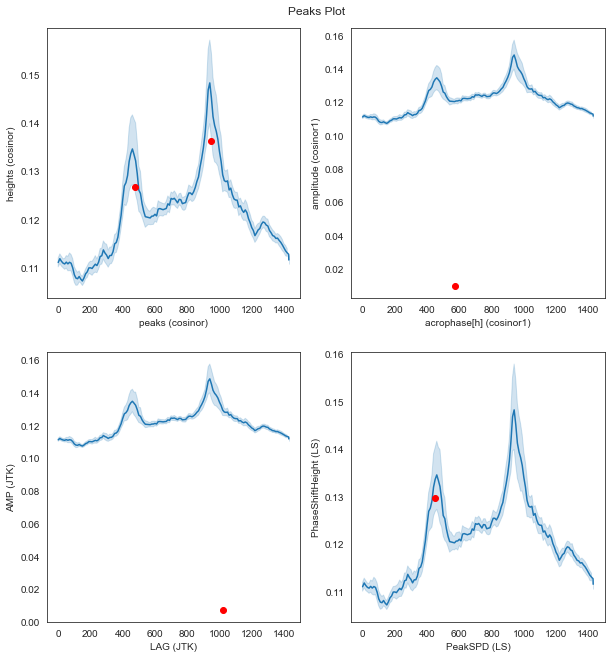

route_1 cosinor
x_peak: [890.81081081] peaks
y_peak: [0.1420936] heights
route_1 cosinor1
x_peak: [579.9879024636365] acrophase[h]
y_peak: [0.0098466243662438] amplitude
route_1 JTK
x_peak: [990.0] LAG
y_peak: [0.0098182002386357] AMP
route_1 LS
x_peak: [694.262990744263] PeakSPD
y_peak: [0.141104379357707] PhaseShiftHeight


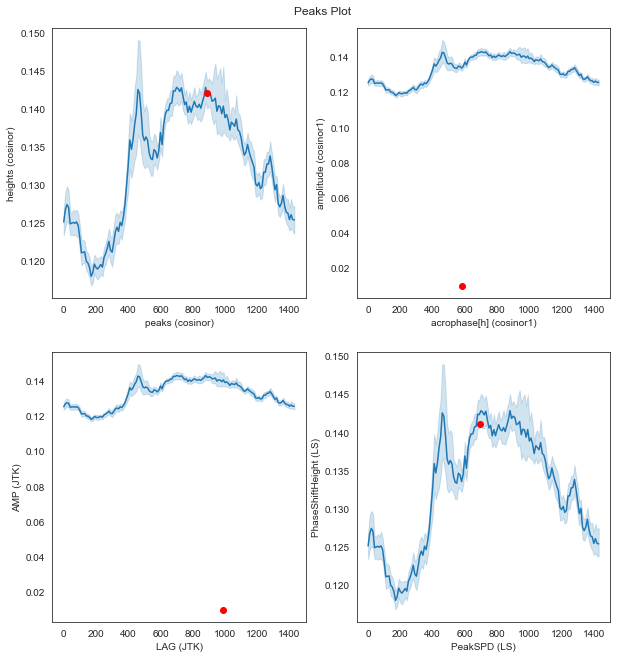

route_2 cosinor
x_peak: [504.5045045, 960.0] peaks
y_peak: [0.16334372, 0.17471534] heights
route_2 cosinor1
x_peak: [593.8728152561658] acrophase[h]
y_peak: [0.0174305034376398] amplitude
route_2 JTK
x_peak: [1020.0] LAG
y_peak: [0.0145993250122732] AMP
route_2 LS
x_peak: [479.219180056578] PeakSPD
y_peak: [0.164102152405716] PhaseShiftHeight


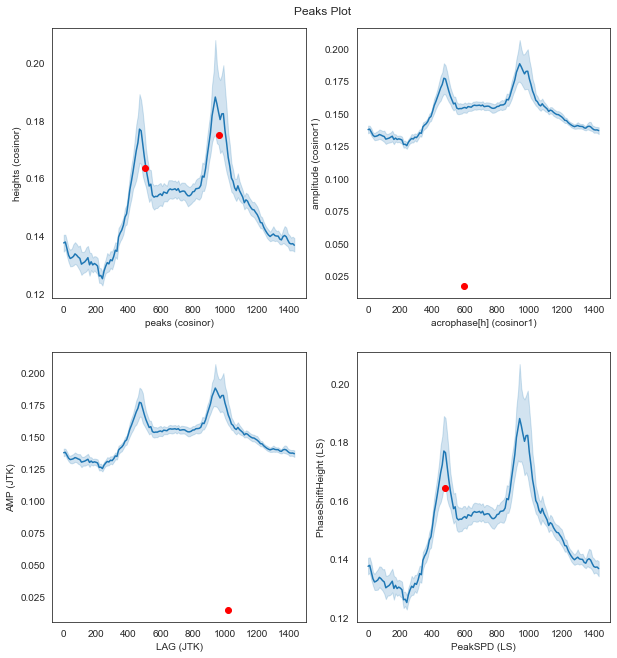

route_3 cosinor
x_peak: [939.81981982] peaks
y_peak: [0.19033421] heights
route_3 cosinor1
x_peak: [576.2442913320313] acrophase[h]
y_peak: [0.0257348001912543] amplitude
route_3 JTK
x_peak: [1080.0] LAG
y_peak: [0.0216649404926778] AMP
route_3 LS
x_peak: [697.025283822957] PeakSPD
y_peak: [0.183227265730881] PhaseShiftHeight


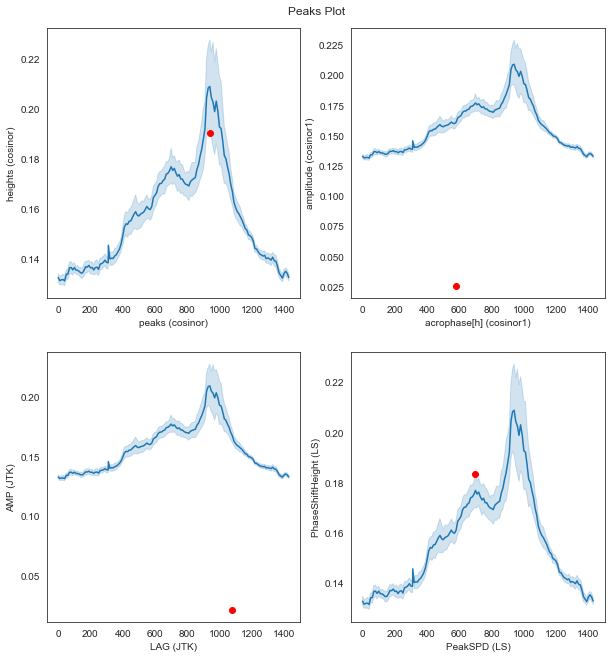

route_4 cosinor
x_peak: [507.38738739, 971.53153153] peaks
y_peak: [0.16120075, 0.16266564] heights
route_4 cosinor1
x_peak: [639.4728504833612] acrophase[h]
y_peak: [0.0188720647068791] amplitude
route_4 JTK
x_peak: [960.0] LAG
y_peak: [0.0166559878035685] AMP
route_4 LS
x_peak: [420.035936980404] PeakSPD
y_peak: [0.156089560428257] PhaseShiftHeight


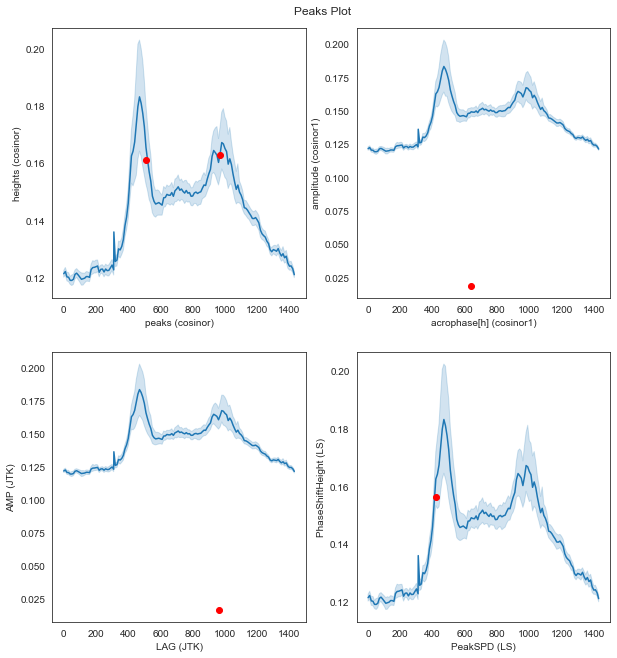

route_5 cosinor
x_peak: [469.90990991, 934.05405405] peaks
y_peak: [0.06118193, 0.06546791] heights
route_5 cosinor1
x_peak: [603.3642523725956] acrophase[h]
y_peak: [0.0042264475324319] amplitude
route_5 JTK
x_peak: [1020.0] LAG
y_peak: [0.0026674708014902] AMP
route_5 LS
x_peak: [233.050955340382] PeakSPD
y_peak: [0.0625772808725006] PhaseShiftHeight


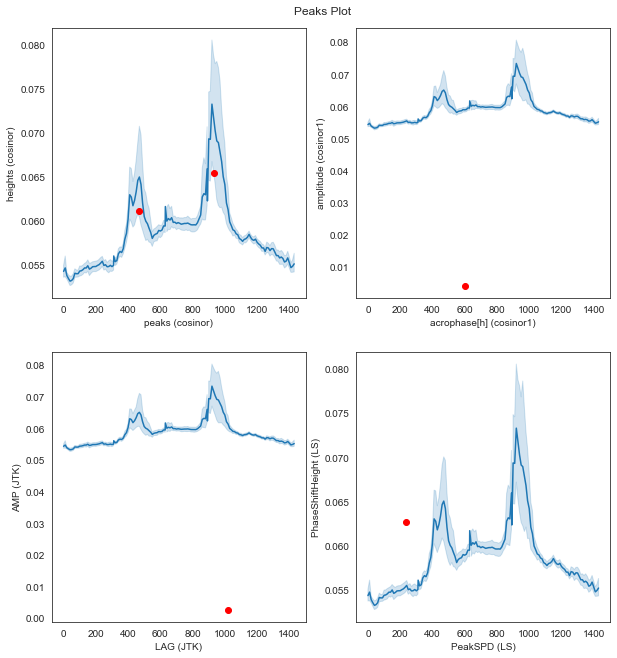

In [91]:
filename='google_traffic.xlsx'
df = rda.cosinor_read(filename)
df['x']=df['x']*60
filename = f'{filename[:-5]}.csv'
cosinor_peaks(df,filename=filename)

In [ ]:
print(filename)
rda.meta2d_format(filename=filename,sep='\t')

In [ ]:
filename=f"Out/{filename[:-4]}/{filename[:-4]}.csv"
rda.meta2d(filename=filename)

In [ ]:
rda.pv_dist(filename)
rda.pv_venn(filename)

In [ ]:
#import
from rda_package import rda 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from CosinorPy import file_parser,cosinor
filename='google_traffic.csv'
print(filename)
df = pd.read_csv(filename,sep='\t',index_col=0)
df_norep = df.index.to_series()
for i in range(0,1421,10):
    avg_filter = df.filter(regex=f'T{i}').mean(axis = 1)
    avg_filter.name = i
    df_norep = pd.merge(df_norep, avg_filter,left_index=True,right_index=True)
df_norep=df_norep.drop('gene',axis=1)

In [ ]:
df_ridge1 = rda.analysis(df_norep,filename=filename,time_unit_label='minutes')

In [ ]:
#import
from rda_package import rda 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from CosinorPy import file_parser,cosinor
filename='google_traffic_workdays.csv'
print(filename)
df = pd.read_csv(filename,sep='\t',index_col=0)
df_norep = df.index.to_series()
for i in range(0,1421,10):
    avg_filter = df.filter(regex=f'T{i}').mean(axis = 1)
    avg_filter.name = i
    df_norep = pd.merge(df_norep, avg_filter,left_index=True,right_index=True)
df_norep=df_norep.drop('gene',axis=1)
df_norep.to_csv('norep_'+filename)

In [ ]:
rda.rain(filename='norep_'+filename,sample_rate=10,n_replicate=1,period=1440)